<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/Belt_Exam_drug200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/drug200.csv"
df = pd.read_csv(filename)

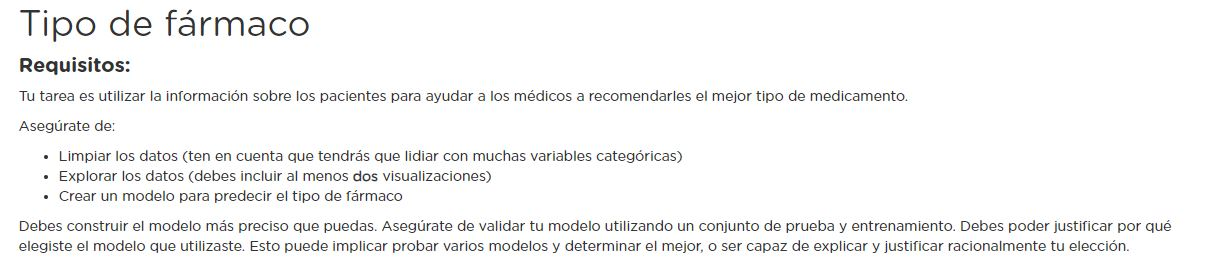

1.Exploración y depuración de datos

In [66]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


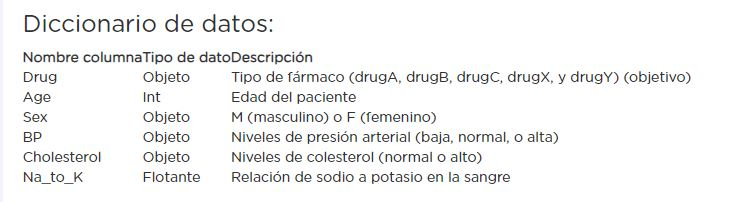

In [67]:
# Existe una consistencia completa entre el diccionario de datos y el dataframe incorporado, lo que permite inicialmente comenzar a confiar en dicha base de datos.

In [68]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [69]:
# Tal como se vio en elementos anteriores, no existe ningun dato nulo, sin embargo ahora evaluaremos si existe algun dato duplicado
duplicados = df.duplicated()
duplicados.sum()

0

Consideraciones Iniciales:

    1. **Variables Categoricas**: Las variables sexo, BP, Cholesterol & Drug se visualizan como variables categoricas, sin embargo y para efectos de mejorar nuestro estudio de las mismas, seran reinterpretadas como variables cuantitativas a traves de un diccionario individual para cada una.

    2. Target: el objetivo principal de nuestro request es poder predecir nuestra variable objetivo, en este caso; "Drug", la cual es una variable categoria, lo que a priori nos permitira trabajar con nuestros conocidos modelos de aprendizaje automatico para valores categoricos (KNN, Random forest, etc).

In [70]:
#Previo a realizar nuestra transformacion de variables categoricas a numericas, revisaremos nuestra estadistica descriptiva
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


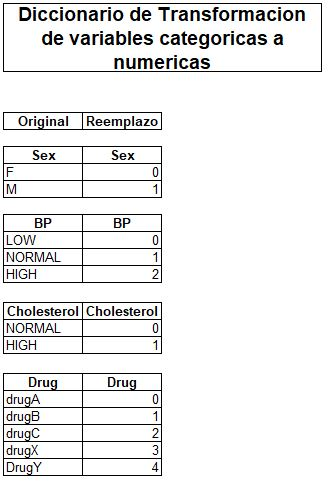

In [71]:
#A continuacion comenzaremos a realizar nuestra transformacion de datos desde variables categoricas a numericas, lo que nos permitira tener un mejor entidimiento de cada una tanto de manera individual, como conjunta (como se relacionan entre si)

df2=df
#Sex
df2['Sex'] = df2['Sex'].replace("F",0)
df2['Sex'] = df2['Sex'].replace("M",1)
#BP
df2['BP'] = df2['BP'].replace("LOW",0)
df2['BP'] = df2['BP'].replace("NORMAL",1)
df2['BP'] = df2['BP'].replace("HIGH",2)

#Cholesterol
df2['Cholesterol'] = df2['Cholesterol'].replace("NORMAL",0)
df2['Cholesterol'] = df2['Cholesterol'].replace("HIGH",1)

#Drug
df2['Drug'] = df2['Drug'].replace("drugA",0)
df2['Drug'] = df2['Drug'].replace("drugB",1)
df2['Drug'] = df2['Drug'].replace("drugC",2)
df2['Drug'] = df2['Drug'].replace("drugX",3)
df2['Drug'] = df2['Drug'].replace("DrugY",4)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [72]:
#Habiendo ya realizado nuestra respectiva transformacion con base al diccionario previamente expuesto, veremos como se ve representada nuestra nueva estadistica descriptiva
df2.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,1.065000,0.515000,16.084485,2.870000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,1.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [73]:
#Solo a objetos poder revisar la data en toda su detalle realizaremos una revision directa en excel
df2.to_excel("drug200e.xlsx", index=False)

2. Visualización y navegacion de dataframe

2.1 Correlacion entre variables

A continuacion confeccionaremos una matriz de correlacion con el objeto de obtener informacion relevante sobre las distintas variables y comenzar a definir ciertas premisas e hipotesis, para posterior a ello someterlas a ciertas pruebas y extraer conclusiones sobre las misma.

In [74]:
#A continuacion analizamos la correlacion entra las variables cuantitativas (habiendo realizado ya nuestra transformacion).
import pandas as pd
corr_df = df2.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.044952,0.008811,-0.125008,-0.098573
BP,-0.120918,-0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,-0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,-0.328665,-0.055629,0.589120,1.000000


2.2 Principales Premisas, hipotesis y nivel de relacion entre las variables.

A partir de nuestra matriz de correlacion ya podemos comenzar a establecer ciertas relaciones relevantes:

  1. Tipo de Droga y Relacion de sodio y potasio en la sangre: existe una estrecha relacion entre ambas, sin embargo puede estar siendo afectada por nuestra transformacion de variable a categorica a numerica, por lo cual revisaremos visualmente dicho efecto.

  2.  Niveles de presion arterial y el tipo de droga, al igual que en el punto anterior, es posible asumir que existe una relacion relevante entre estas 2 variables.

  3. A priori elementos como la edad, el sexo y el nivel de colesterol, parece que tuviera una alta ingerencia en el tipo de droga a suministrar, sin embargo evaluaremos la relacion entre ellas, para evaluar si de manera conjunta pudiesen afectar.

2.3 Evaluacion de Premisas (Visualizacion)

<function matplotlib.pyplot.show(*args, **kw)>

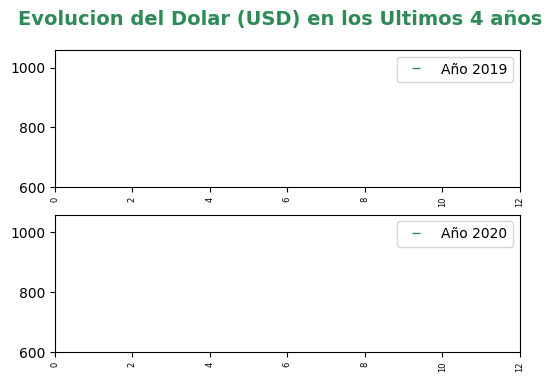

In [75]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Evolucion del Dolar (USD) en los Ultimos 4 años", fontsize=14, fontweight="bold",color = "seagreen" )

plt.subplot(211)
plt.plot(df2["Na_to_K"],df2["Drug"],'_', label= "Año 2019" , color = "seagreen",)
plt.xticks(rotation=90, size=6)
plt.axis([0,12,600,1060])
plt.legend()

plt.subplot(212)
plt.plot(df2["Na_to_K"],df2["Drug"],'_', label= "Año 2020" , color = "seagreen")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,600,1060])
plt.legend()

plt.show